In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import lux

In [2]:
df = pd.read_csv("credit_card_approval.csv")
print(df.shape)
df.head()

(690, 16)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.isna().sum()/len(df)*100

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
df = df.drop(['Industry', 'Ethnicity', 'Citizen', 'DriversLicense', 'ZipCode'], axis = 1)

In [6]:
for i in df.columns:
    print("*****",i,"*******")
    print()
    print(set(df[i].tolist()))

***** Gender *******

{0, 1}
***** Age *******

{13.75, 15.83, 16.25, 17.58, 18.67, 19.58, 19.17, 20.17, 21.83, 22.92, 23.25, 24.5, 22.08, 27.17, 26.0, 26.67, 27.75, 27.67, 28.92, 29.67, 25.0, 27.83, 28.25, 29.92, 30.83, 32.08, 33.17, 36.67, 36.75, 38.25, 39.58, 41.17, 42.5, 42.08, 42.0, 45.83, 41.0, 47.75, 48.08, 47.0, 49.5, 54.42, 54.58, 56.58, 57.42, 58.67, 56.42, 54.33, 56.75, 62.5, 57.83, 56.5, 58.33, 67.75, 68.67, 60.58, 65.42, 71.58, 69.17, 69.5, 74.83, 73.42, 76.75, 15.75, 80.25, 16.5, 16.0, 17.5, 17.25, 18.75, 18.5, 18.0, 18.25, 19.75, 19.0, 19.5, 38.33, 20.75, 20.5, 20.0, 20.25, 21.5, 21.25, 21.75, 21.0, 22.5, 22.75, 22.25, 22.0, 23.75, 23.0, 23.5, 24.75, 25.5, 25.75, 25.25, 26.75, 26.25, 26.5, 27.25, 27.0, 28.75, 28.5, 28.0, 29.25, 29.5, 29.75, 30.5, 30.75, 30.25, 30.0, 31.25, 31.75, 31.0, 32.75, 32.0, 32.25, 33.75, 33.5, 33.25, 33.0, 34.25, 34.0, 34.5, 34.75, 35.25, 35.75, 35.0, 36.0, 36.25, 36.5, 37.5, 37.75, 38.75, 39.5, 39.25, 39.0, 40.0, 40.25, 41.5, 41.75, 42.75, 42.25

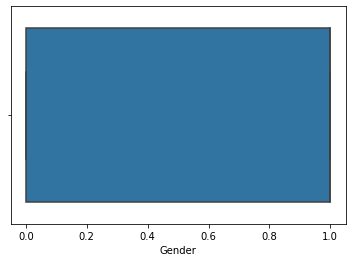

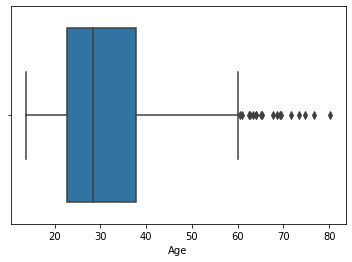

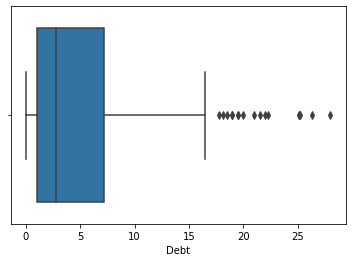

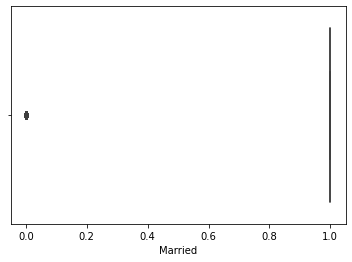

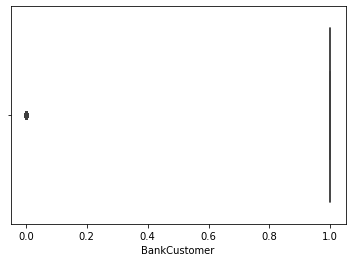

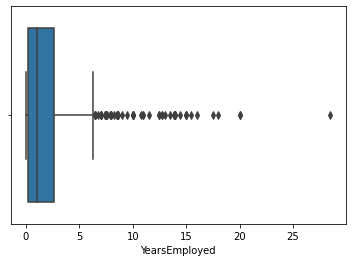

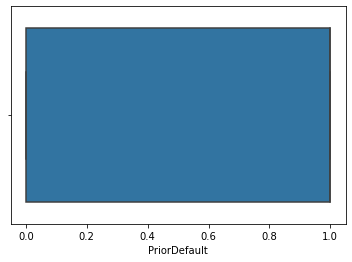

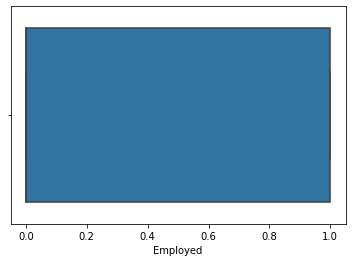

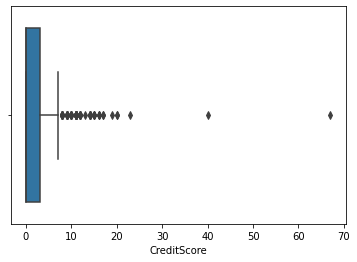

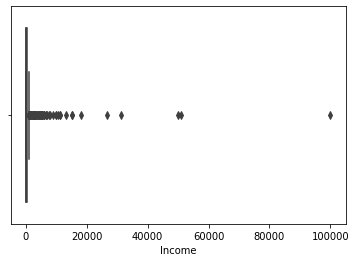

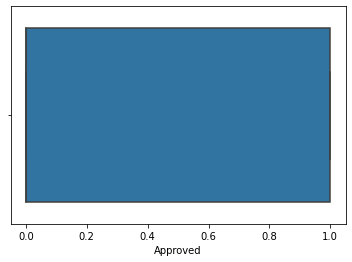

In [7]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in df.columns:
    boxplots(i)

In [8]:
Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [9]:
df = df[~((df < (Q1 - 1.5 * IQR)) |
                         (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
df.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
x = df.drop(['Approved'], axis=1)
y = df['Approved']

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
y.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
import imblearn

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(x, y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(337, 10)
(113, 10)
(337,)
(113,)


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
GB = GradientBoostingClassifier()
AB = AdaBoostClassifier()

In [19]:
Models = [DT, RF, XGB, GB, AB]

In [20]:
Model = ['Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'Adaboost']

In [26]:
for i in Models:
    x = i.fit(x_train, y_train)
    tr = i.predict(x_train)
    te = i.predict(x_test)
    
for j in Model:
    print()
    print(f"--> {j} --> Test Accuracy : {accuracy_score(y_train, tr)} --> Train Accuracy : {accuracy_score(y_test, te)}")
#     print("Acc_tr", accuracy_score(y_train, tr))
#     print("Acc_te", accuracy_score(y_test, te))


--> Decision Tree --> Test Accuracy : 0.8961424332344213 --> Train Accuracy : 0.8584070796460177

--> Random Forest --> Test Accuracy : 0.8961424332344213 --> Train Accuracy : 0.8584070796460177

--> XGBoost --> Test Accuracy : 0.8961424332344213 --> Train Accuracy : 0.8584070796460177

--> Gradient Boosting --> Test Accuracy : 0.8961424332344213 --> Train Accuracy : 0.8584070796460177

--> Adaboost --> Test Accuracy : 0.8961424332344213 --> Train Accuracy : 0.8584070796460177
